In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

/Users/lirt/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# merge original dataset
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
original_df = pd.read_csv("../data/original.csv")
train_df = pd.concat([train_df, original_df], axis=0)

## 1 Descriptive Statistics

In [3]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0.0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1.0,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2.0,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3.0,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4.0,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
train_df.tail()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
32576,NaN,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,NaN,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,NaN,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,NaN,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0
32580,NaN,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0.15,N,30,0


In [5]:
train_df.shape

(91226, 13)

In [6]:
train_df.isna().sum()

id                            32581
person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length               895
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                  3116
loan_percent_income               0
cb_person_default_on_file         0
cb_person_cred_hist_length        0
loan_status                       0
dtype: int64

In [7]:
test_df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  float64
 1   person_age                  91226 non-null  int64  
 2   person_income               91226 non-null  int64  
 3   person_home_ownership       91226 non-null  object 
 4   person_emp_length           90331 non-null  float64
 5   loan_intent                 91226 non-null  object 
 6   loan_grade                  91226 non-null  object 
 7   loan_amnt                   91226 non-null  int64  
 8   loan_int_rate               88110 non-null  float64
 9   loan_percent_income         91226 non-null  float64
 10  cb_person_default_on_file   91226 non-null  object 
 11  cb_person_cred_hist_length  91226 non-null  int64  
 12  loan_status                 91226 non-null  int64  
dtypes: float64(4), int64(5), object(4)
m

In [9]:
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,91226.000000,9.122600e+04,90331.000000,91226.000000,88110.000000,91226.000000,91226.000000,91226.000000
mean,29322.000000,27.616480,6.477071e+04,4.732119,9350.348607,10.789508,0.163154,5.810219,0.169447
std,16929.497605,6.148115,4.793696e+04,4.025068,5848.605423,3.108998,0.097491,4.038412,0.375149
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.000000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.700000e+04,4.000000,8000.000000,10.950000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.800000e+04,7.000000,12000.000000,13.110000,0.220000,8.000000,0.000000
max,58644.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [10]:
test_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


In [11]:
train_df['loan_status'] = train_df['loan_status'].map({0: 'Not Approved', 1: 'Approved'})

In [12]:
categorical_columns = train_df.select_dtypes(include=['object']).columns.to_list()

# Remove 'loan_status' from the list
if 'loan_status' in categorical_columns:  
    categorical_columns.remove('loan_status')

print(categorical_columns) 

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [13]:
numerical_columns = train_df.select_dtypes(include=['int', 'float']).columns.to_list()

if 'id' in numerical_columns:
    numerical_columns.remove('id')
    
print(numerical_columns)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


**Observation**

1. The maximum value of `person_age` is 144 and the maximum value of `person_emp_length` is 123, which doesn't make any sense. The error might come from synthetic data generating process. Note that test set doesn't suffer from outliers that much.


## 2 Missing values

In [14]:
missing_info = train_df.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

print("Missing values for train set:")
for column, missing_percentage in missing_info.items():
    print(f"{column}: {train_df[column].isna().sum()} ({missing_percentage:.2f}%)")

Missing values for train set:
id: 32581 (35.71%)
loan_int_rate: 3116 (3.42%)
person_emp_length: 895 (0.98%)


**Observation**

Missing values are less than 5%, which won't cause significant information loss when dropped.

## 3 Check for imbalanced dataset

In [15]:
train_df['loan_status'].value_counts(normalize=True)

loan_status
Not Approved    0.830553
Approved        0.169447
Name: proportion, dtype: float64

<BarContainer object of 2 artists>

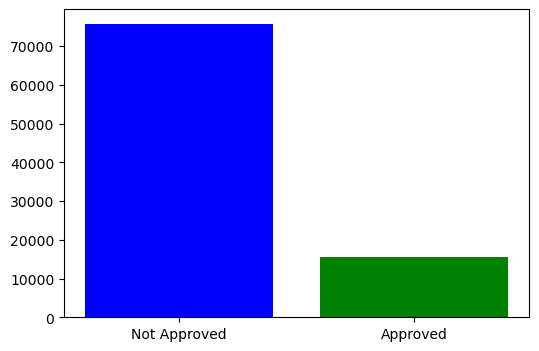

In [16]:
plt.figure(figsize=(6, 4))
plt.bar(train_df['loan_status'].value_counts().index, train_df['loan_status'].value_counts().values, color=['blue', 'green'])

**Observation**:

We have an imbalanced dataset and there are several measures we can take to train a fairer binary classifier:

1. Pre-Processing:

Check whether you can get more data or not.

Use sampling techniques (Sample minority class, Downsample majority class, can take the hybrid approach as well). We can also use data augmentation to add more data points for the minority class but with little deviations/changes leading to new data points that are similar to the ones they are derived from. The most common/popular technique is SMOTE (Synthetic Minority Oversampling technique)

Suppression: Though not recommended, we can drop off some features directly responsible for the imbalance.

Learning Fair Representation: Projecting the training examples to a subspace or plane minimizes the data imbalance.

Re-Weighting: We can assign some weights to each training example to reduce the imbalance in the data.

2. In-Processing:

Regularisation: We can add score terms that measure the data imbalance in the loss function and therefore minimizing the loss function will also minimize the degree of imbalance concerning the score chosen which also indirectly minimizes other metrics that measure the degree of data imbalance.

Adversarial Debiasing: Here we use the adversarial notion to train the model where the discriminator tries to detect if there are signs of data imbalance in the predicted data by the generator and hence the generator learns to generate data that is less prone to imbalance.

3. Post-Processing:

Odds-Equalization: Here we try to equalize the odds for the classes with respect to the data is imbalanced for correct imbalance in the trained model. Usually, the F1 score is a good choice, if both precision and recall scores are important

Choose appropriate performance metrics. For example, accuracy is not a correct metric to use when classes are imbalanced. Instead, use precision, recall, F1 score, and ROC curve.

## 4 Univariate Analysis

### 4.1 Categorical Features

In [17]:
for col in categorical_columns:
    print(f"The distribution of {col} is: ")
    print(train_df[col].value_counts(normalize=True) * 100)

The distribution of person_home_ownership is: 
person_home_ownership
RENT        51.564247
MORTGAGE    41.948567
OWN          6.272335
OTHER        0.214851
Name: proportion, dtype: float64
The distribution of loan_intent is: 
loan_intent
EDUCATION            20.524850
MEDICAL              18.640519
VENTURE              17.242891
PERSONAL             17.031329
DEBTCONSOLIDATION    15.724684
HOMEIMPROVEMENT      10.835727
Name: proportion, dtype: float64
The distribution of loan_grade is: 
loan_grade
A    34.815732
B    33.818210
C    19.176551
D     9.492908
E     2.162761
F     0.427510
G     0.106329
Name: proportion, dtype: float64
The distribution of cb_person_default_on_file is: 
cb_person_default_on_file
N    84.163506
Y    15.836494
Name: proportion, dtype: float64


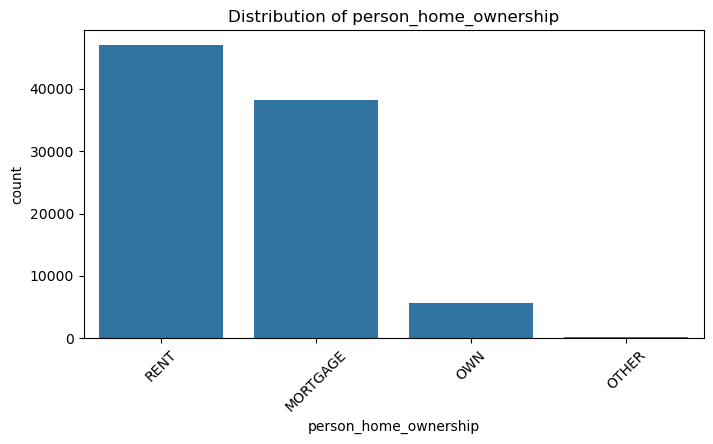

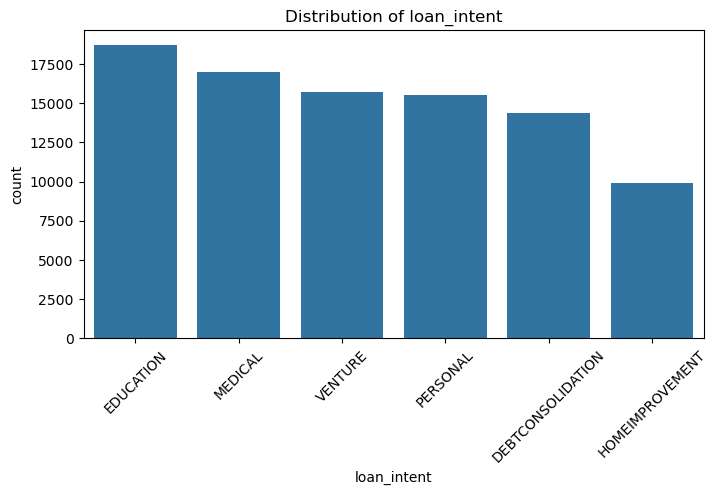

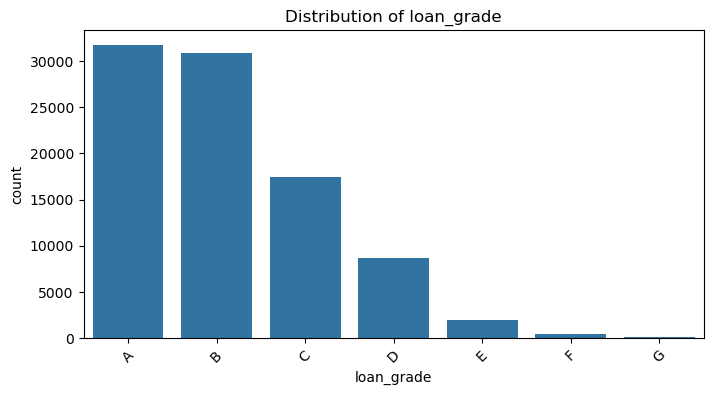

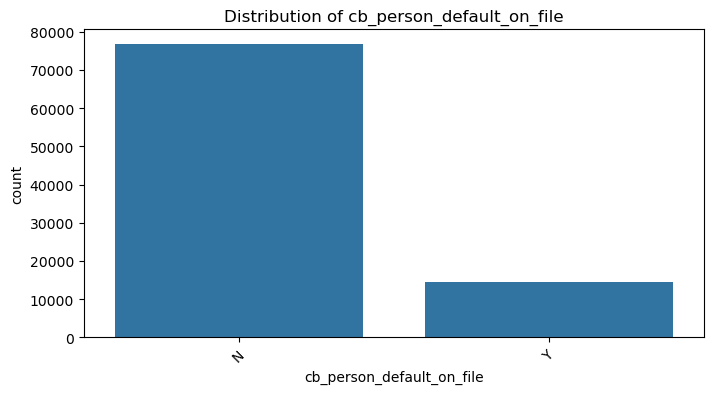

In [18]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sorted_order = train_df[col].value_counts().index
    
    # Create the countplot with sorted bars
    sns.countplot(x=col, data=train_df, order=sorted_order)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

***Observations:***
No high cardinality problems exist in the categorical features

### 4.2 Numerical Features

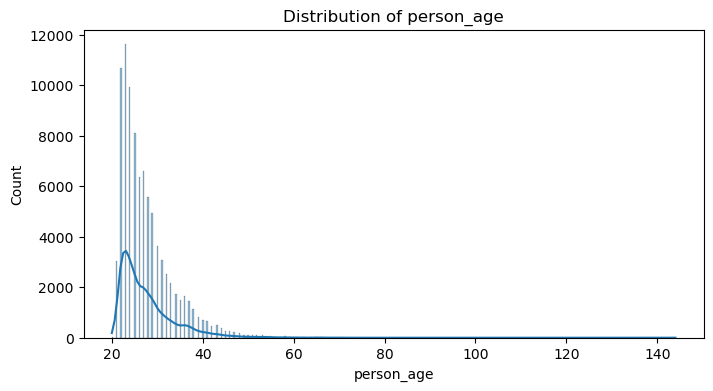

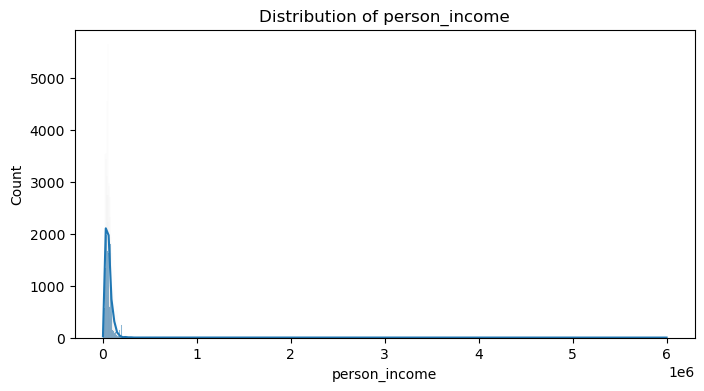

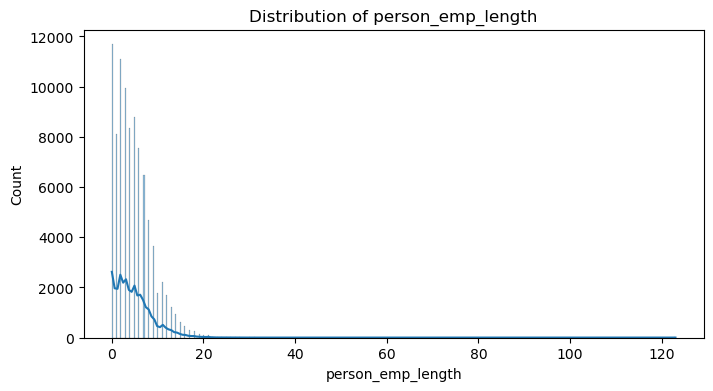

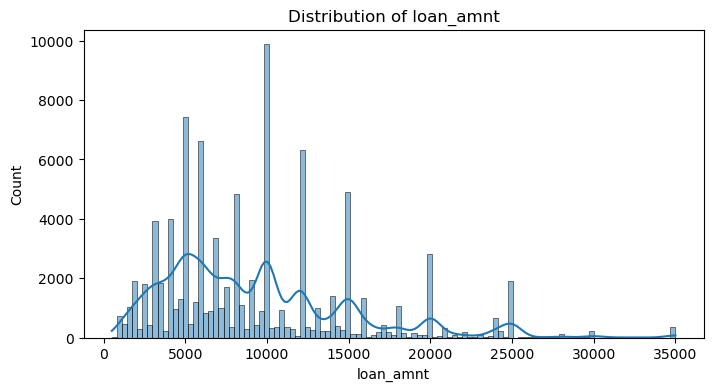

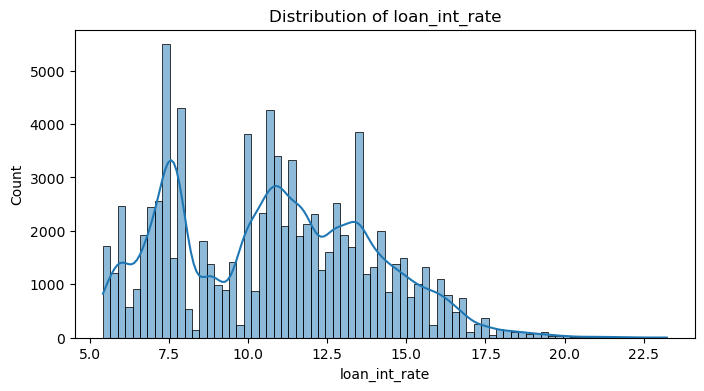

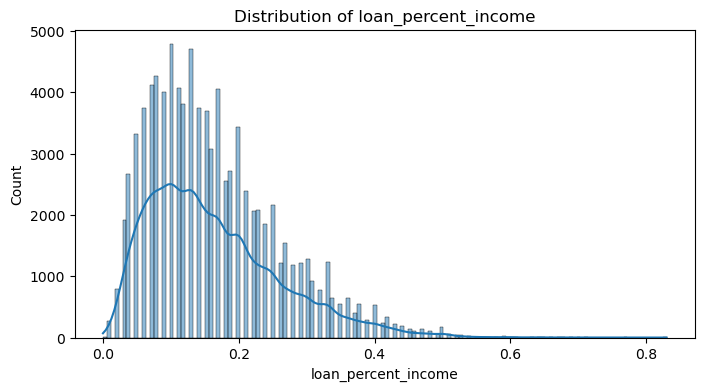

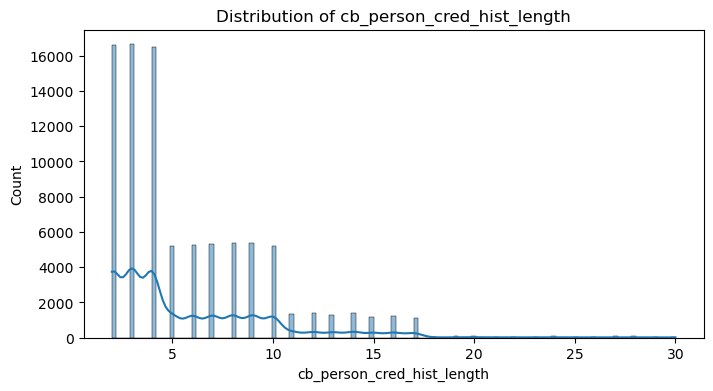

In [19]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Observations**: 

Most of the numerical features are right-skewed.

## 5 Bivariate Analysis

### 5.1 Categorical Features

/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


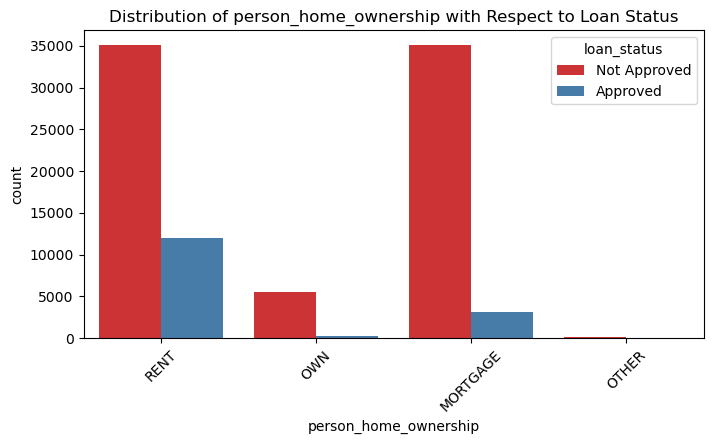

/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


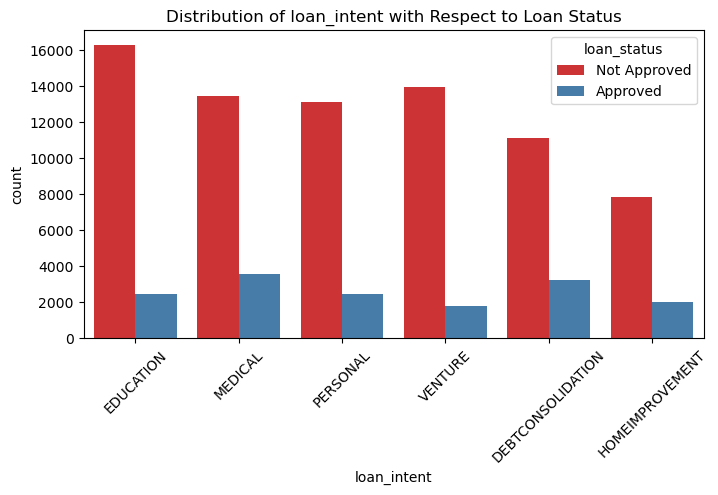

/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


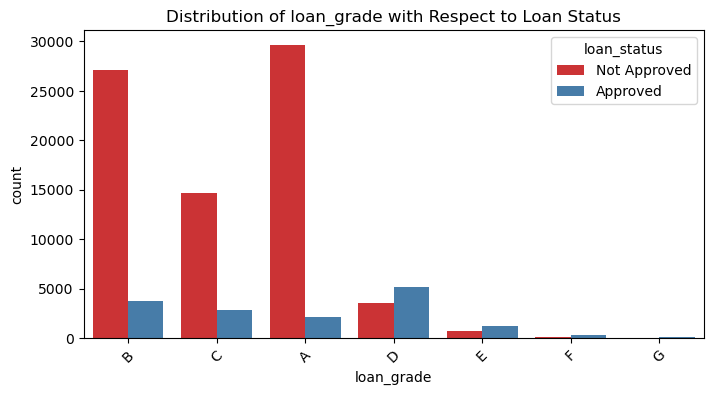

/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


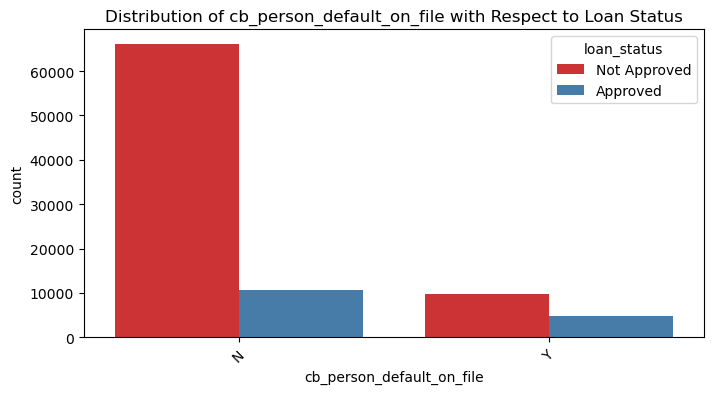

In [20]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='loan_status', data=train_df, palette='Set1')
    plt.title(f'Distribution of {col} with Respect to Loan Status')
    plt.xticks(rotation=45)
    plt.show()

**Observation**:

There are some counterintuitive findings in the Bivariate Analysis part. For example, the percentage of people who own their property and get their loans approved is lower compared to those who "rent" or have a "mortgage." Additionally, almost one-third of people who have a default record still got their loans approved, which is surprisingly high. 

### 5.2 Numerical Features

In [21]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [22]:
numerical_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [23]:
# Before plotting the density plot, we need to first impute the missing values

for col in ['person_emp_length', 'loan_int_rate']:
    train_df.loc[:, col] = train_df[col].fillna(train_df[col].median())

/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-pac

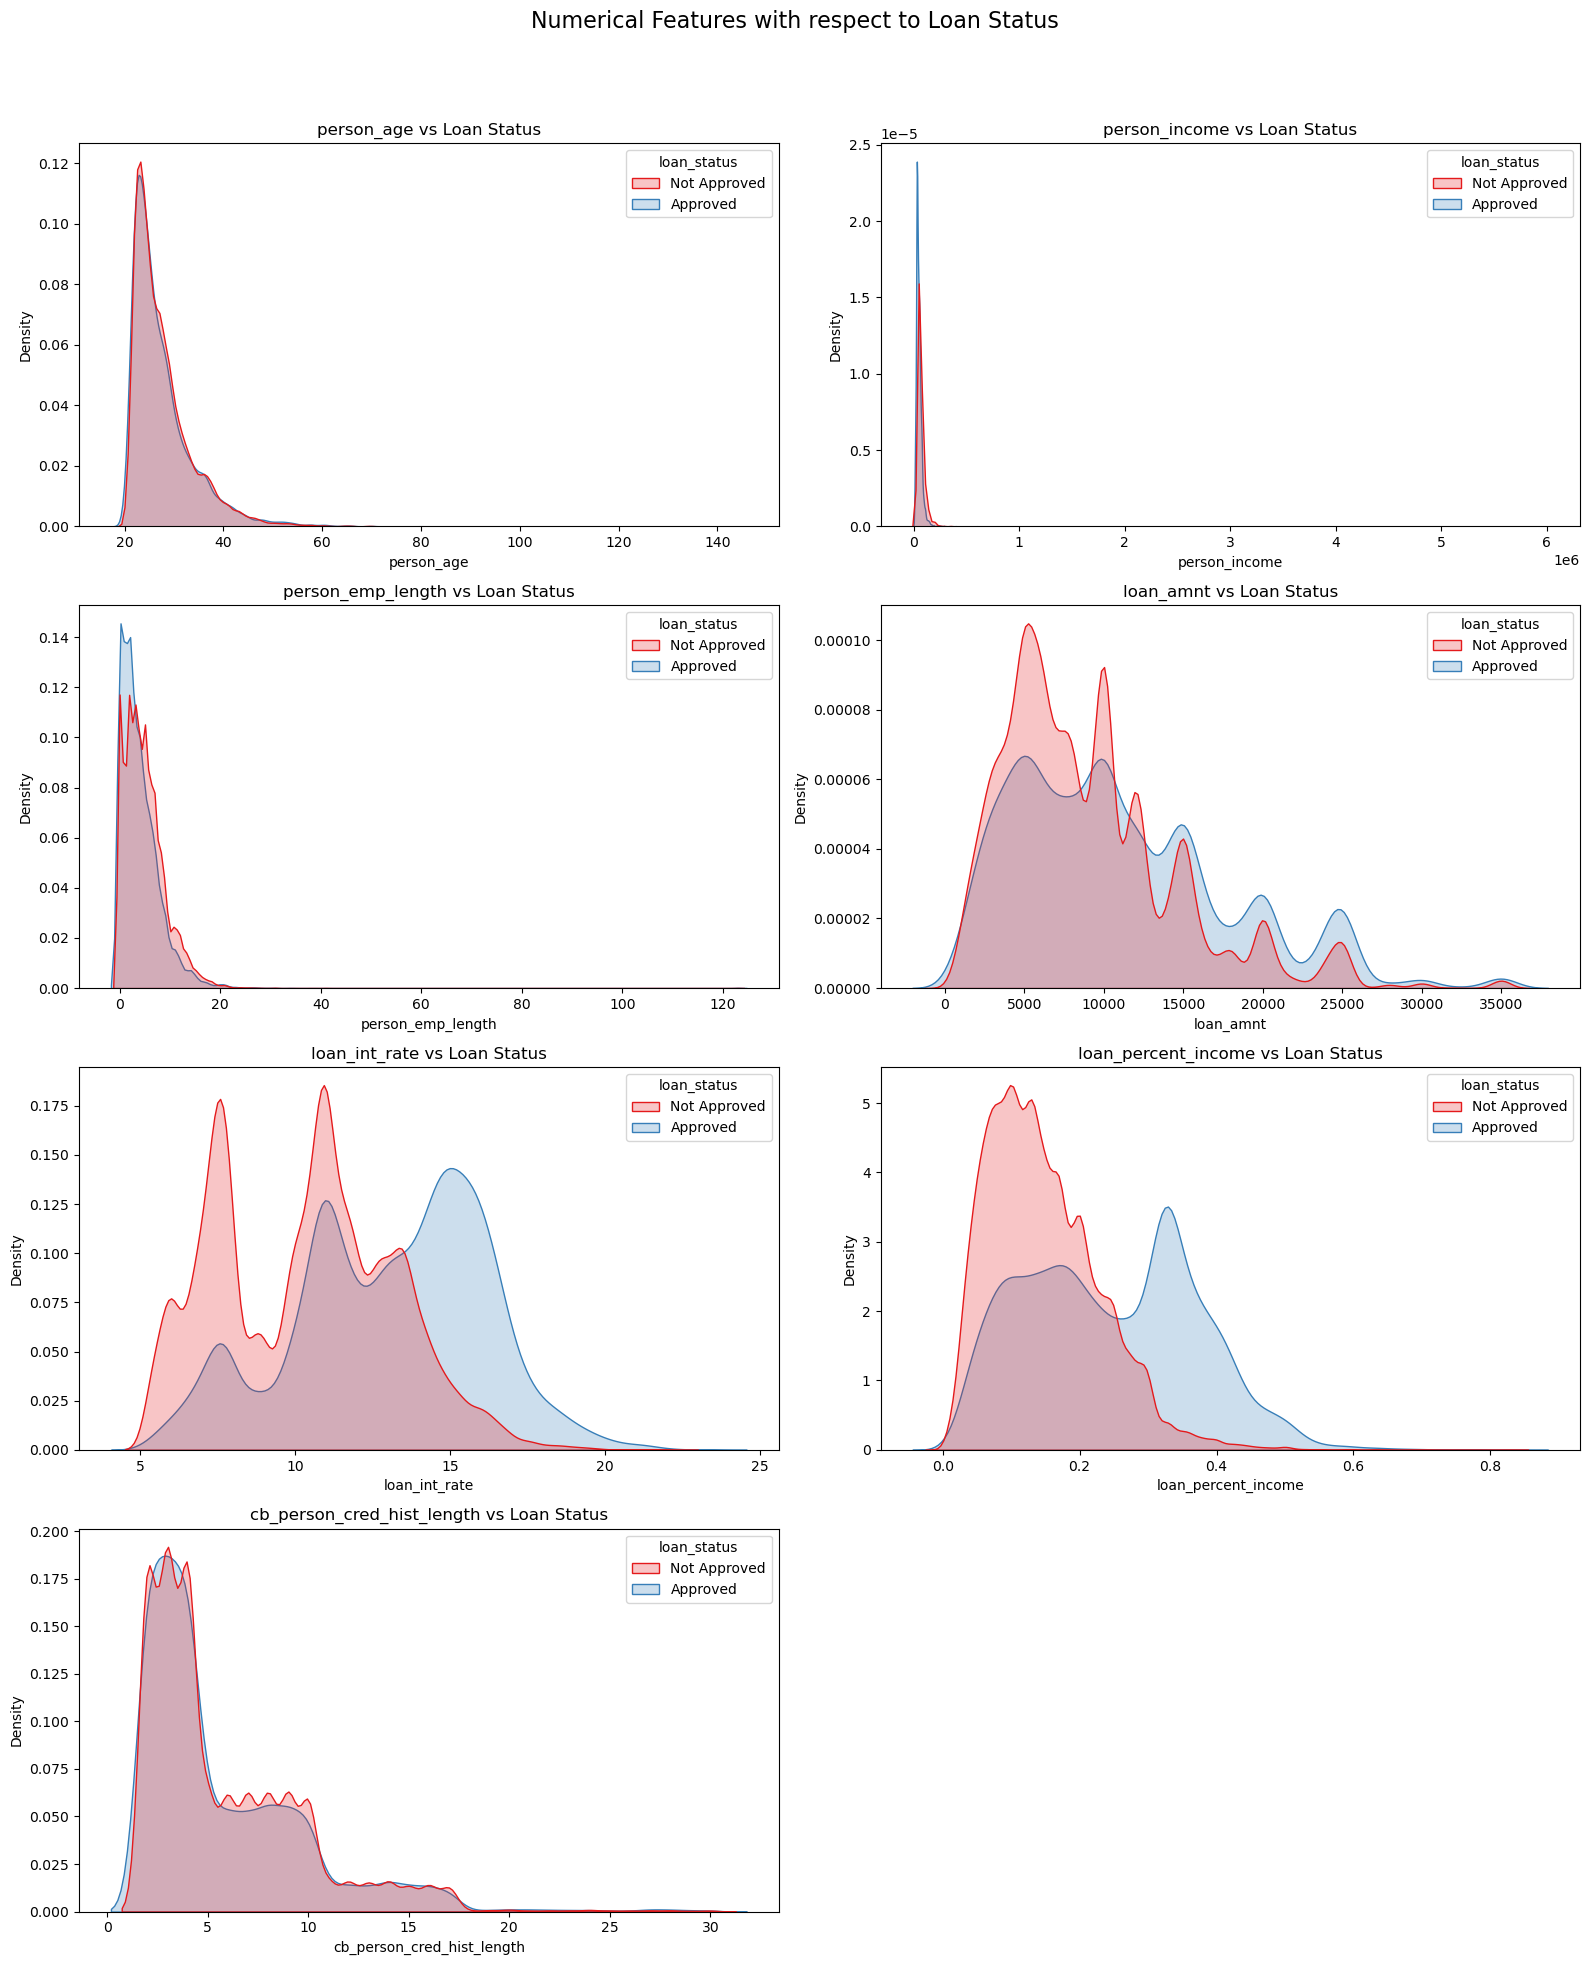

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Numerical Features with respect to Loan Status', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=train_df, x=col, hue='loan_status', ax=axes[i//2, i%2], fill=True, common_norm=False, palette='Set1')
    axes[i//2, i%2].set_title(f'{col} vs Loan Status')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')
    
fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 6 Multivariate Analysis

In [ ]:
# Plot the pairplot

numerical_columns_with_target = numerical_columns + ['loan_status']
sns.pairplot(train_df[numerical_columns_with_target], hue='loan_status', palette='Set2')
plt.show()

/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/lirt/miniconda3/lib/python3.11/site-pac

In [ ]:
corr_matrix = train_df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 7 Outlier Detection to ensure data integrity

### 7.1 Visual Inspection with box plot

In [ ]:
plt.style.use('ggplot') 
for col in numerical_columns:
    boxprops = dict(linewidth=2, color='darkblue')  # Box properties
    whiskerprops = dict(linewidth=2, color='darkblue')  # Whisker properties
    medianprops = dict(linewidth=2, color='red')  # Median line properties
    flierprops = dict(marker='o', color='orange', markersize=5)  # Outlier properties
    
    plt.boxplot(train_df[col], boxprops=boxprops, whiskerprops=whiskerprops, 
                medianprops=medianprops, flierprops=flierprops, showmeans=True, 
                meanprops=dict(marker='D', markerfacecolor='green', markersize=6))
    
    # Add grid for easier readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set title and labels
    plt.title(f"Box plot for {col}", fontsize=14)
    plt.ylabel('Values', fontsize=12)
    plt.xticks([1], [col], fontsize=12)
    
    plt.show()

### 7.2 Tukey's IQR method

Tukey’s (1977) technique is used to detect outliers in skewed or non bell-shaped data since it makes no distributional assumptions. However, Tukey’s method may not be appropriate for a small sample size. The general rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal.

Procedure:

Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR = Q3-Q1.
Define the normal data range with lower limit as Q1–1.5 IQR and upper limit as Q3+1.5 IQR.
Any data point outside this range is considered as outlier and should be removed for further analysis.

In [ ]:
def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers


# params dataset, number of outliers for rejection, list of features
Outliers_to_drop = detect_outliers(train_df, 2, numerical_columns)

In [ ]:
len(Outliers_to_drop)

***Observation***

Tukey's IQR method revealed that 838 out of 91,226 data points are outliers and should be removed.